# Total Compensation

In [1]:
# Import necessary library
import pandas as pd
import numpy as np

# Assume we have a dataset of 10000 employees
np.random.seed(0)  # for reproducibility
n = 10000
data = {
    'Employee_ID': range(1, n+1),
    'Job_Title': np.random.choice(['Teacher', 'Principal', 'Counselor', 'Librarian'], n),
    'Department': np.random.choice(['Math', 'Science', 'English', 'History'], n),
    'Location': np.random.choice(['New York', 'Connecticut', 'Rhode Island'], n),
    'Years_of_Experience': np.random.randint(1, 30, n),
    'Education_Level': np.random.choice(['Bachelor', 'Master', 'PhD'], n),
    'Performance_Rating': np.random.choice(['Below Average', 'Average', 'Above Average'], n),
    'Base_Salary': np.random.randint(50000, 100000, n),
    'Bonus': np.random.randint(5000, 10000, n),
    'Benefits': np.random.randint(2000, 5000, n),
    'Gender': np.random.choice(['Male', 'Female'], n),
    'Age': np.random.randint(25, 65, n),
    'Ethnicity': np.random.choice(['White', 'Black', 'Hispanic', 'Asian', 'Other'], n)
}

df = pd.DataFrame(data)

# Calculate current total compensation
df['Total_Compensation'] = df['Base_Salary'] + df['Bonus'] + df['Benefits']

# Calculate total compensation cost for the company
current_total_cost = df['Total_Compensation'].sum()
print(f"Current Total Compensation Cost: {current_total_cost}")

# Scenario 1: Increase base salary by 5% for all employees, increase bonus by 10% for employees with above average performance, and increase benefits by 3% for employees with a PhD
df['Scenario1_Base_Salary'] = df['Base_Salary'] * 1.05
df['Scenario1_Bonus'] = np.where(df['Performance_Rating'] == 'Above Average', df['Bonus'] * 1.10, df['Bonus'])
df['Scenario1_Benefits'] = np.where(df['Education_Level'] == 'PhD', df['Benefits'] * 1.03, df['Benefits'])

# Calculate new total compensation under Scenario 1
df['Scenario1_Total_Compensation'] = df['Scenario1_Base_Salary'] + df['Scenario1_Bonus'] + df['Scenario1_Benefits']

# Calculate new total compensation cost for the company under Scenario 1
new_total_cost_scenario1 = df['Scenario1_Total_Compensation'].sum()
print(f"New Total Compensation Cost under Scenario 1: {new_total_cost_scenario1}")

# Scenario 2: Increase base salary by 7% for employees in the Science department, increase bonus by 15% for employees with more than 10 years of experience, and increase benefits by 5% for female employees
df['Scenario2_Base_Salary'] = np.where(df['Department'] == 'Science', df['Base_Salary'] * 1.07, df['Base_Salary'])
df['Scenario2_Bonus'] = np.where(df['Years_of_Experience'] > 10, df['Bonus'] * 1.15, df['Bonus'])
df['Scenario2_Benefits'] = np.where(df['Gender'] == 'Female', df['Benefits'] * 1.05, df['Benefits'])

# Calculate new total compensation under Scenario 2
df['Scenario2_Total_Compensation'] = df['Scenario2_Base_Salary'] + df['Scenario2_Bonus'] + df['Scenario2_Benefits']

# Calculate new total compensation cost for the company under Scenario 2
new_total_cost_scenario2 = df['Scenario2_Total_Compensation'].sum()
print(f"New Total Compensation Cost under Scenario 2: {new_total_cost_scenario2}")


Current Total Compensation Cost: 862808396
New Total Compensation Cost under Scenario 1: 903309328.5700002
New Total Compensation Cost under Scenario 2: 884247143.84


# Validate

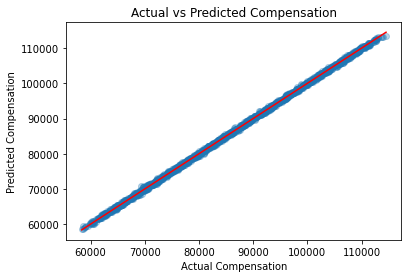

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assume we have a dataset of 10000 employees
np.random.seed(0)  # for reproducibility
n = 10000
data = {
    'Employee_ID': range(1, n+1),
    'Job_Title': np.random.choice(['Teacher', 'Principal', 'Counselor', 'Librarian'], n),
    'Department': np.random.choice(['Math', 'Science', 'English', 'History'], n),
    'Location': np.random.choice(['New York', 'Connecticut', 'Rhode Island'], n),
    'Years_of_Experience': np.random.randint(1, 30, n),
    'Education_Level': np.random.choice(['Bachelor', 'Master', 'PhD'], n),
    'Performance_Rating': np.random.choice(['Below Average', 'Average', 'Above Average'], n),
    'Base_Salary': np.random.randint(50000, 100000, n),
    'Bonus': np.random.randint(5000, 10000, n),
    'Benefits': np.random.randint(2000, 5000, n),
    'Gender': np.random.choice(['Male', 'Female'], n),
    'Age': np.random.randint(25, 65, n),
    'Ethnicity': np.random.choice(['White', 'Black', 'Hispanic', 'Asian', 'Other'], n)
}

df = pd.DataFrame(data)

# Calculate current total compensation
df['Total_Compensation'] = df['Base_Salary'] + df['Bonus'] + df['Benefits']

# Convert categorical variables to numeric using label encoding
le = LabelEncoder()
categorical_features = ['Job_Title', 'Department', 'Location', 'Education_Level', 'Performance_Rating', 'Gender', 'Ethnicity']
df[categorical_features] = df[categorical_features].apply(le.fit_transform)

# Split the data into training and test sets
X = df.drop(['Employee_ID', 'Total_Compensation'], axis=1)
y = df['Total_Compensation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train a random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)


# Plot actual vs predicted compensation
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Compensation')
plt.ylabel('Predicted Compensation')
plt.title('Actual vs Predicted Compensation')

# Add a line of perfect fit
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red')

plt.show()


In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Assume we have a dataset of 1000 employees
np.random.seed(0)  # for reproducibility
n = 1000
data = {
    'Years_of_Experience': np.random.randint(1, 30, n),
    'Education_Level': np.random.choice(['Bachelor', 'Master', 'PhD'], n),
    'Job_Role': np.random.choice(['Teacher', 'Principal', 'Counselor', 'Librarian'], n),
    'Salary': np.random.randint(50000, 100000, n)  # This would typically be a function of the other features
}

df = pd.DataFrame(data)

# Define the features and target
features = ['Years_of_Experience', 'Education_Level', 'Job_Role']
target = 'Salary'

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=0)

# Define a pipeline that first one-hot encodes the categorical features and then fits a linear regression model
categorical_features = ['Education_Level', 'Job_Role']
categorical_transformer = OneHotEncoder(drop='first')  # Use drop='first' to avoid the dummy variable trap
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)
], remainder='passthrough')  # Passthrough the numerical features
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
#print(f"Mean Squared Error: {mse}")
